<h1 align = "center">Crop Damage Project </h1>

## Importing Libraries

In [1]:
import pandas as pd  #Helps in analyzing data with python
import numpy as np   #Helps in performing mathematical operations.
import matplotlib.pyplot as plt  #It provides an object-oriented API for embedding plots into applications
import seaborn as sns  #Helps us in data visualization
import warnings #Helps us get rid of warning using warning filter.
 
from sklearn.model_selection import train_test_split #Helps us in dividing the dataset into training and test set.
from sklearn.preprocessing import MinMaxScaler  #Helps us in normalizing the data.
from sklearn.metrics import classification_report,confusion_matrix #Helps us in visualizing the result performed by our model.
from sklearn.metrics import accuracy_score #Helps in analyzing the accuracy score of model

import xgboost as xgb #import xgboost classifier
from sklearn.ensemble import RandomForestClassifier #import random forest classifier
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier
from sklearn.svm import SVC #import svm classifier
from sklearn.neighbors import KNeighborsClassifier #import knn classifier
from sklearn.neural_network import MLPClassifier #import mlp classifier
from sklearn.naive_bayes import GaussianNB #import naive bayes classifier
from sklearn.linear_model import LogisticRegression #import logistic regression classifier

import tensorflow as tf #provides a collection of workflows to develop and train models
from keras.utils import to_categorical #Helps in performing one hot encoding.
from tensorflow.keras.models import Sequential #Helps us in creation of a sequential model.
from tensorflow.keras.layers import Dense, Activation, Dropout #Helps us in the creation of layers of model.
from tensorflow.keras.models import load_model #Helps us in loading the saved model.

%matplotlib inline
plt.style.use("ggplot") 
warnings.simplefilter("ignore") #Helps us get rid of warnings
plt.rcParams["figure.figsize"] = (12, 8) 

Using TensorFlow backend.


## Loading Dataset

In [2]:
train = pd.read_csv("train.csv") #Converting the training data into dataframe
test = pd.read_csv("test.csv")  #converting the testing data into dataframe

## Exploratory Data Analysis

In [3]:
train.head() #Helps in reading the first five rows of training data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
test.head() #Helps in reading the first five rows of test data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
train.columns #Gives the name of all the columns in training data

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
test.columns #Gives the name of all the columns in test data

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [7]:
train.describe()  #gives description about all the variables of training set.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
test.describe()  #gives description about all the variables of test set.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [9]:
train.info()  #gives information about all the variables of training set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [10]:
test.info()  #gives information about all the variables of test set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


Number of target with class 0:  74238
Number of target with class 1:  12307
Number of target with class 2:  2313


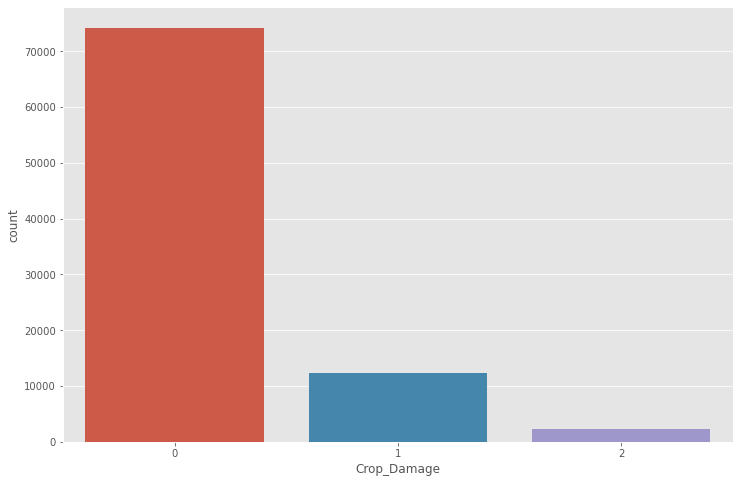

In [11]:
#Looking at the target variable and exploring the imbalance of data.
sns.countplot(x = "Crop_Damage", data = train) 
category_0, category_1, category_2 = train['Crop_Damage'].value_counts()
print('Number of target with class 0: ', category_0)
print('Number of target with class 1: ', category_1)
print('Number of target with class 2: ', category_2)

In [12]:
train.corr() #various correlations between different variables of training set.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.232192,-0.133117,-0.000184,1.000000


<AxesSubplot:>

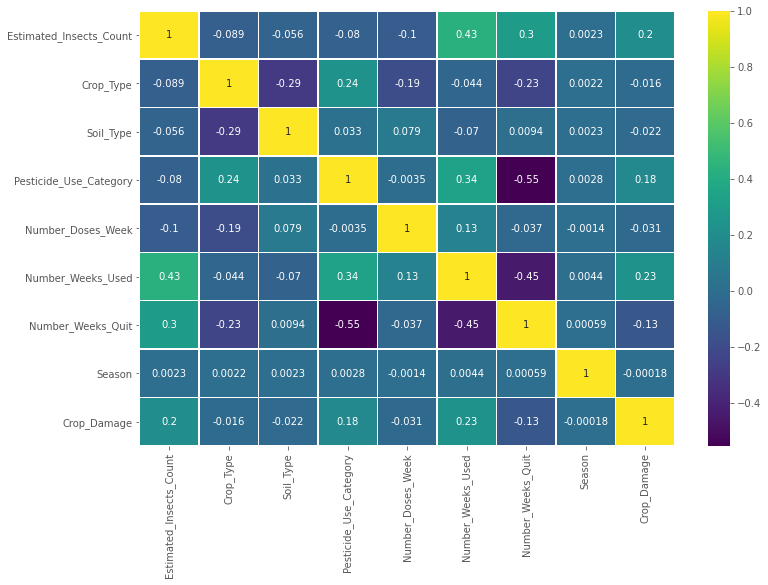

In [13]:
# plotting the correlations
sns.heatmap(train.corr(), annot = True, linewidth = 0.5,cmap='viridis')

In [14]:
test.corr() #various correlations between different variables of test set.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,-0.092645,-0.056395,-0.085671,-0.103554,0.437127,0.300151,-0.006288
Crop_Type,-0.092645,1.000000,-0.292243,0.231684,-0.189827,-0.044664,-0.235283,0.002850
Soil_Type,-0.056395,-0.292243,1.000000,0.036276,0.078851,-0.066028,0.008656,-0.003056
Pesticide_Use_Category,-0.085671,0.231684,0.036276,1.000000,0.004707,0.344605,-0.551182,-0.004395
Number_Doses_Week,-0.103554,-0.189827,0.078851,0.004707,1.000000,0.127386,-0.040878,0.001580
Number_Weeks_Used,0.437127,-0.044664,-0.066028,0.344605,0.127386,1.000000,-0.445626,-0.003330
Number_Weeks_Quit,0.300151,-0.235283,0.008656,-0.551182,-0.040878,-0.445626,1.000000,0.003223
Season,-0.006288,0.002850,-0.003056,-0.004395,0.001580,-0.003330,0.003223,1.000000


<AxesSubplot:>

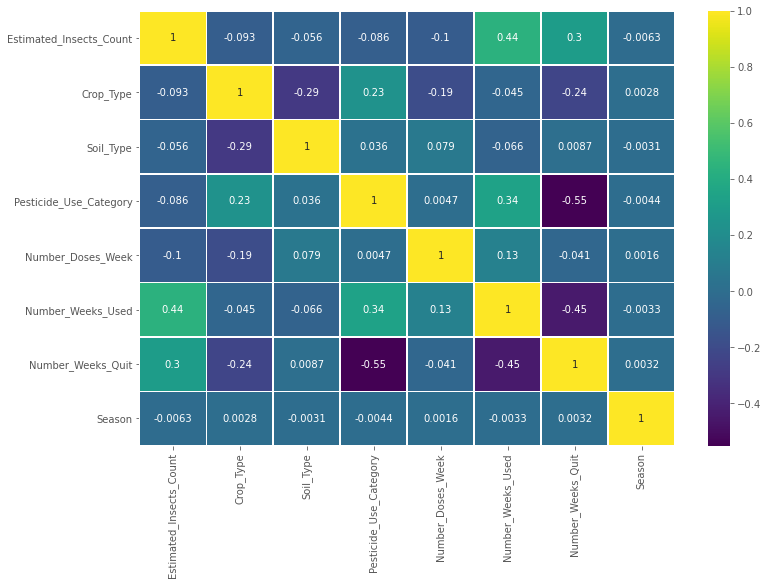

In [15]:
# plotting the correlations
sns.heatmap(test.corr(), annot = True, linewidth = 0.5,cmap='viridis')

<AxesSubplot:xlabel='Crop_Type', ylabel='Soil_Type'>

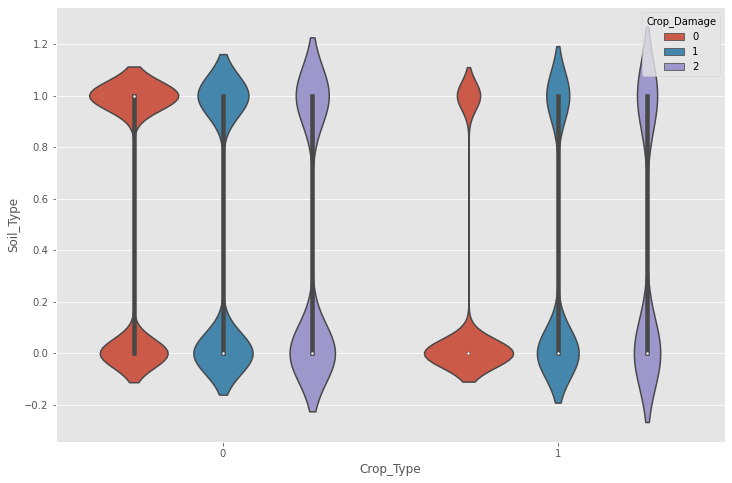

In [16]:
#plotting the relation between crop type and soil type based on crop damage results.
sns.violinplot(x = "Crop_Type", y = "Soil_Type", data = train ,hue = "Crop_Damage")  

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='Number_Weeks_Used'>

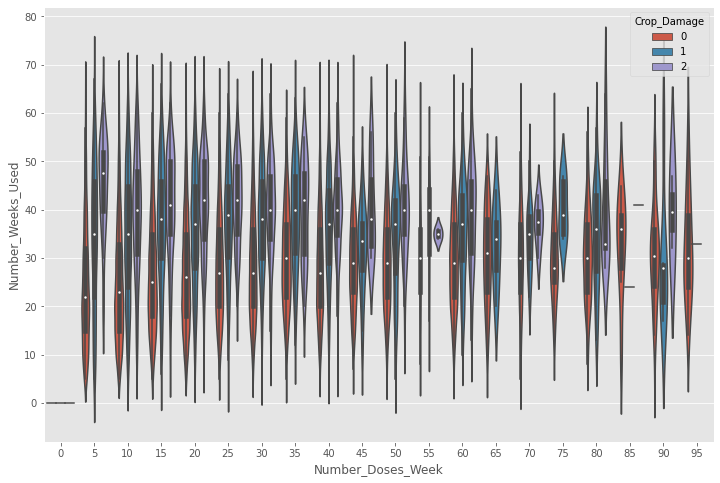

In [17]:
#plotting the relation between number of deses in week and number of weeks used based on crop damage results.
sns.violinplot(x = "Number_Doses_Week", y = "Number_Weeks_Used", data = train ,hue = "Crop_Damage")

<AxesSubplot:xlabel='Number_Weeks_Quit', ylabel='Number_Weeks_Used'>

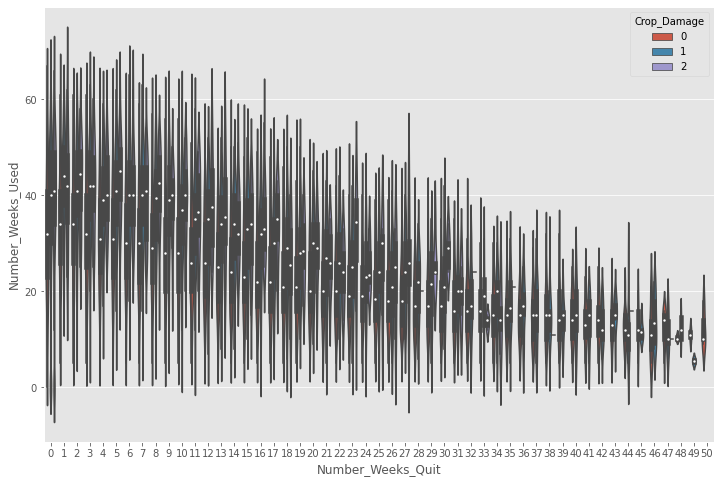

In [18]:
#plotting the relation between number of weeks quit and number of weeks used based on crop damage results.
sns.violinplot(x = "Number_Weeks_Quit", y = "Number_Weeks_Used", data = train ,hue = "Crop_Damage")

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

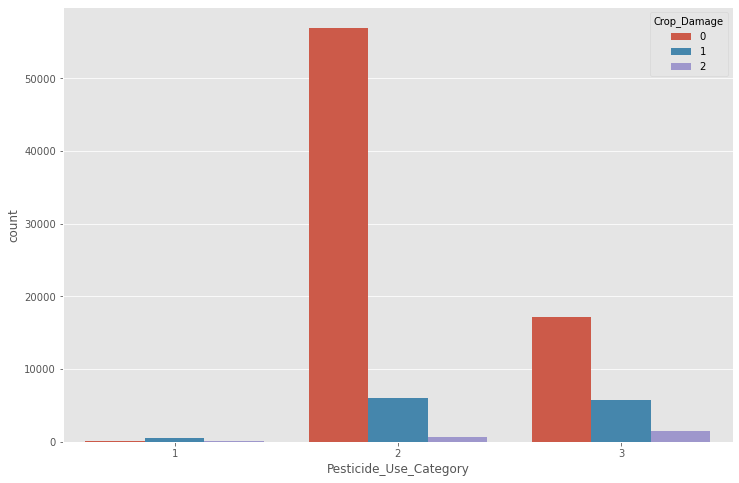

In [19]:
#plotting the relation between pesticide used and crop damage results.
sns.countplot(x = "Pesticide_Use_Category", data = train, hue = "Crop_Damage")

<AxesSubplot:xlabel='Estimated_Insects_Count'>

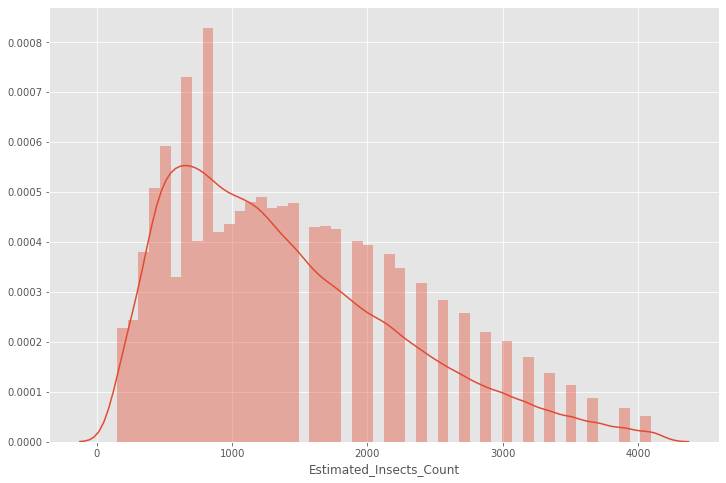

In [20]:
#visualization of the value of estimated insect counts.
sns.distplot(train['Estimated_Insects_Count'], bins = 50)

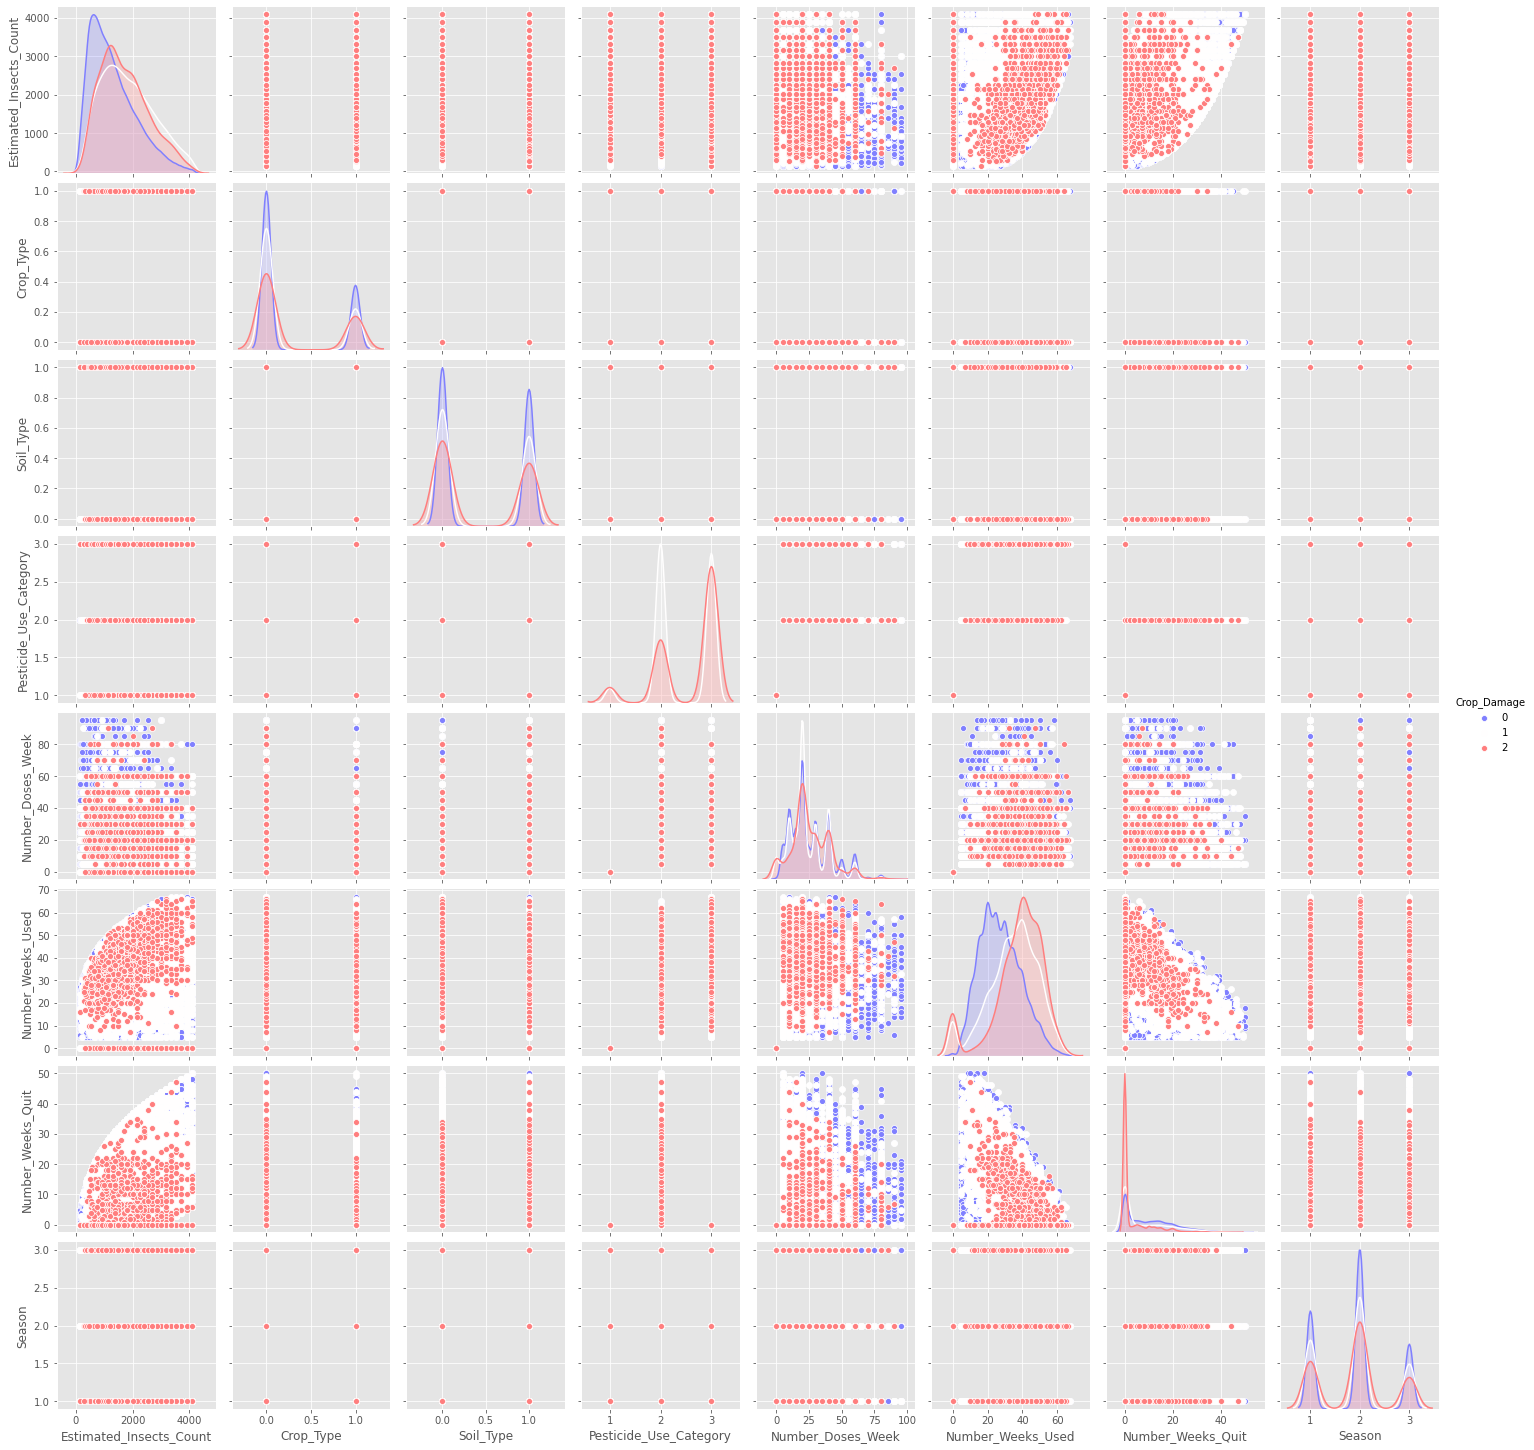

In [21]:
#visualizing the cntire dateset with respect to each other.
sns.pairplot(train.drop(['ID'], axis = 1),hue='Crop_Damage',palette='bwr')

## Missing Data

<AxesSubplot:>

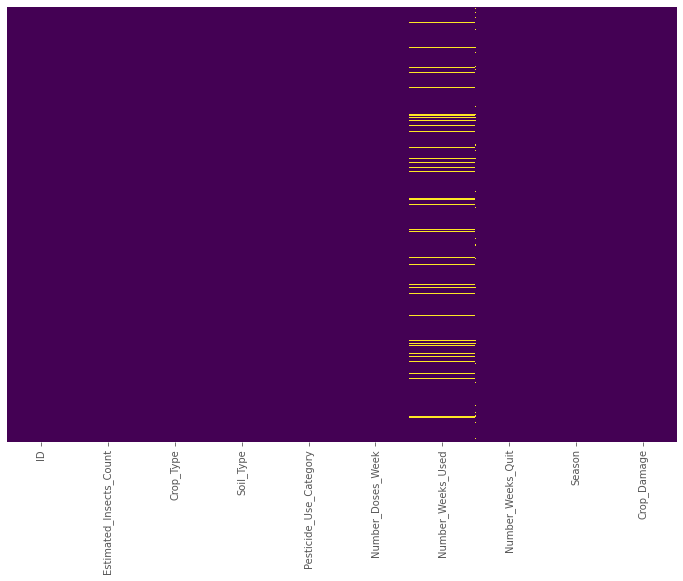

In [22]:
#checking for columns having any missing values in training set.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [23]:
#Number_Weeks_Used has some missing values.
train['Number_Weeks_Used'].describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [24]:
#the mean value comes out to be around 29.
#so filling in the missing data with the value 29.
train['Number_Weeks_Used'].fillna(value = 29.0, inplace = True)

<AxesSubplot:>

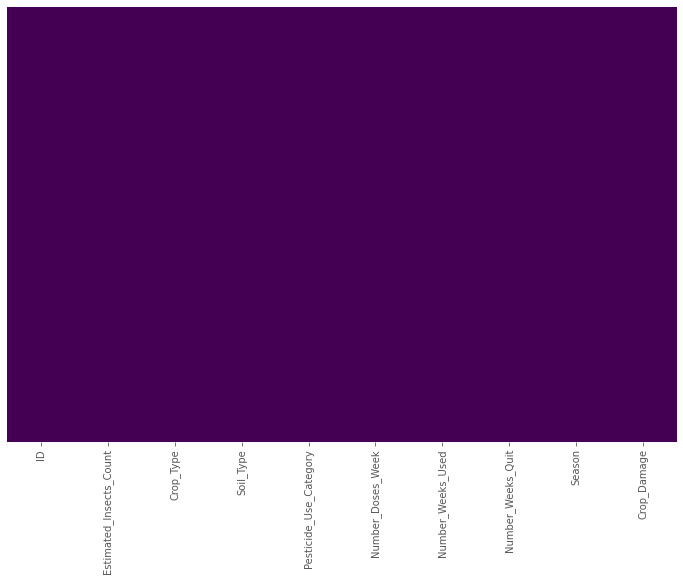

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis") #rechecking for missing data

<AxesSubplot:>

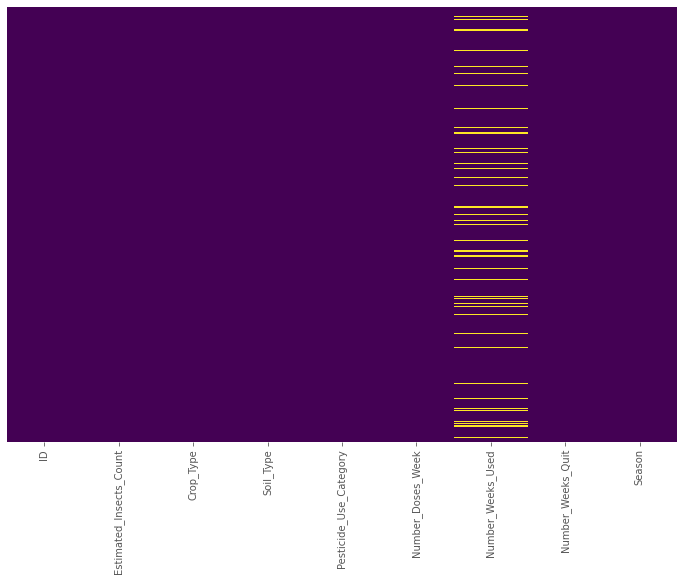

In [26]:
#checking for columns having any missing values in test set.
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [27]:
#Number_Weeks_Used has some missing values.
test['Number_Weeks_Used'].describe()

count    53417.000000
mean        28.705094
std         12.421211
min          0.000000
25%         20.000000
50%         28.000000
75%         38.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [28]:
#the mean value comes out to be around 29.
#so filling in the missing data with the value 29.
test['Number_Weeks_Used'].fillna(value = 29.0, inplace = True)

<AxesSubplot:>

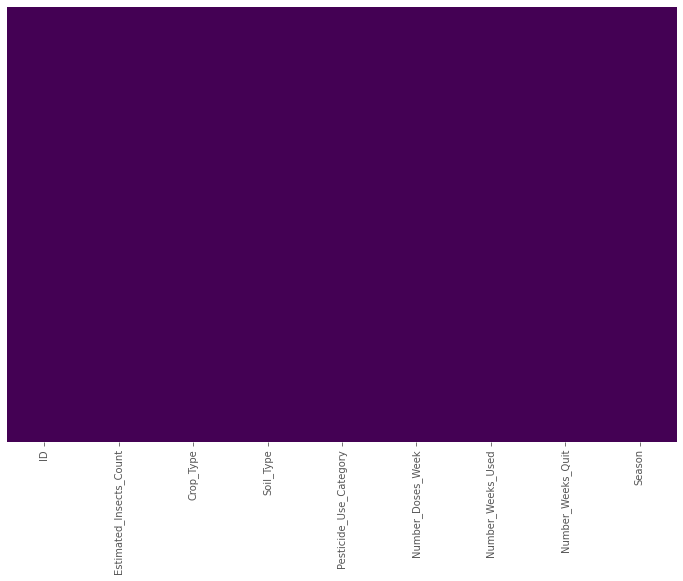

In [29]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis") #rechecking for missing data

## Dealing with data imbalance

In [30]:
train_crop_damage_0 = train[train['Crop_Damage'] == 0]
train_crop_damage_1 = train[train['Crop_Damage'] == 1]
train_crop_damage_2 = train[train['Crop_Damage'] == 2]

In [31]:
from sklearn.utils import resample #resampling of minority data.

train_crop_damage_1_unsample = resample(train_crop_damage_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=25000,    # to match majority class
                                 random_state=101) # reproducible results

train_crop_damage_2_unsample = resample(train_crop_damage_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=15000,    # to match majority class
                                 random_state=101) # reproducible results

In [32]:
#creating new training set with upsampled data.
train_resampled = pd.concat([train_crop_damage_0, train_crop_damage_1_unsample, train_crop_damage_2_unsample])

In [33]:
train_resampled.info() #gives information about all the variables of upsampled training set.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114238 entries, 0 to 63888
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       114238 non-null  object 
 1   Estimated_Insects_Count  114238 non-null  int64  
 2   Crop_Type                114238 non-null  int64  
 3   Soil_Type                114238 non-null  int64  
 4   Pesticide_Use_Category   114238 non-null  int64  
 5   Number_Doses_Week        114238 non-null  int64  
 6   Number_Weeks_Used        114238 non-null  float64
 7   Number_Weeks_Quit        114238 non-null  int64  
 8   Season                   114238 non-null  int64  
 9   Crop_Damage              114238 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 9.6+ MB


## Creating set for training and testing

In [34]:
train_df = train_resampled.drop(['ID'], axis = 1) #dropping ID column
test_df = test.drop(['ID'], axis = 1) #dropping ID column

## Splitting of training data

In [35]:
X = train_df.drop(['Crop_Damage'], axis = 1) #dropping target column
y = train_df['Crop_Damage'] #target column

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.2, 
                                                  random_state = 101,
                                                  stratify = y)         #creating training and validation set. 

## Normalizing the Dataset

In [36]:
scaler = MinMaxScaler() #creating an instance

X_train = scaler.fit_transform(X_train) #normalizing training set
X_val = scaler.transform(X_val) #normalizing validation set
test_df = scaler.transform(test_df) #normalizing test set

# Classification using Xgboost Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.75      0.94      0.83     14848
           1       0.44      0.24      0.31      5000
           2       0.46      0.23      0.31      3000

    accuracy                           0.69     22848
   macro avg       0.55      0.47      0.48     22848
weighted avg       0.64      0.69      0.65     22848

Acuuracy is:  0.6917454481792717


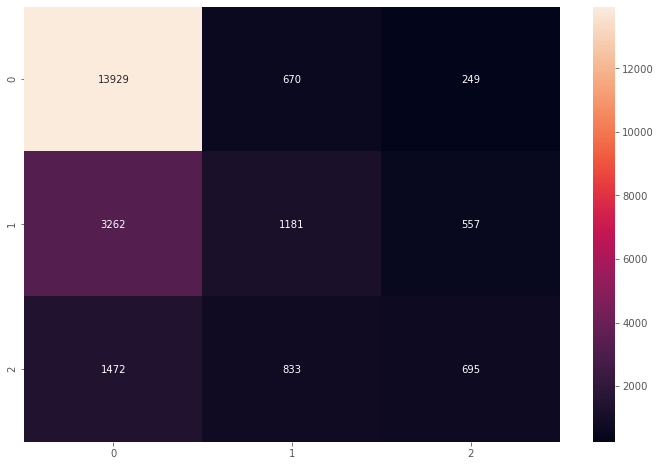

In [37]:
clf = xgb.XGBClassifier(random_state = 101) #creating an instance of xgboost classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using Random Forest Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     14848
           1       0.81      0.80      0.80      5000
           2       0.88      0.97      0.92      3000

    accuracy                           0.90     22848
   macro avg       0.88      0.90      0.89     22848
weighted avg       0.90      0.90      0.90     22848

Acuuracy is:  0.9043242296918768


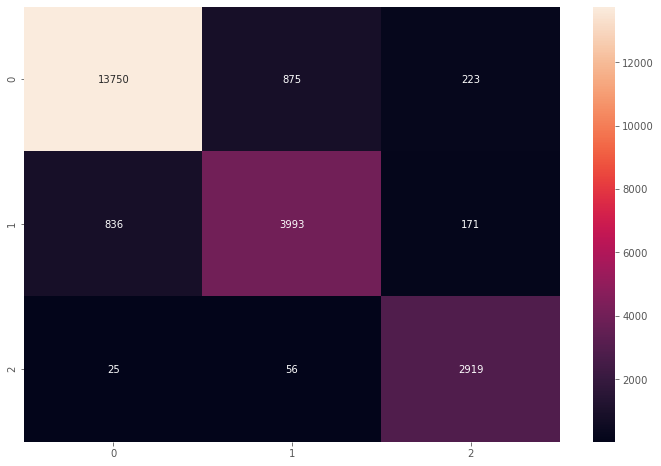

In [38]:
clf = RandomForestClassifier(max_depth = 25, random_state = 101) #creating an instance of random forest classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using Decision Tree Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     14848
           1       0.66      0.79      0.72      5000
           2       0.81      0.96      0.87      3000

    accuracy                           0.85     22848
   macro avg       0.80      0.86      0.83     22848
weighted avg       0.86      0.85      0.85     22848

Acuuracy is:  0.8451505602240896


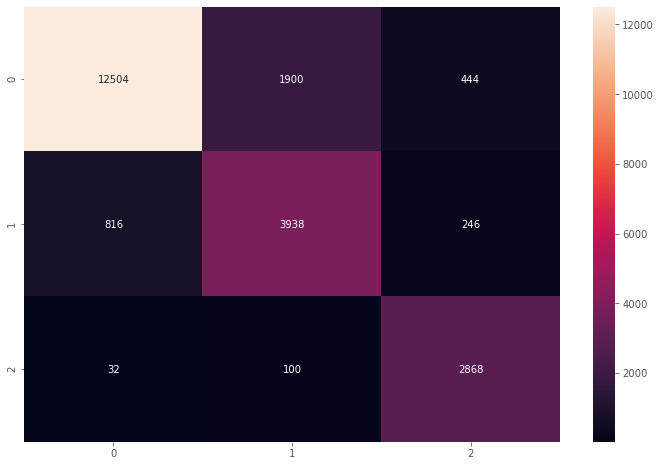

In [39]:
clf = DecisionTreeClassifier(max_depth = 25, random_state = 101) #creating an instance of decision tree classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using SVM Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.72      0.95      0.82     14848
           1       0.45      0.19      0.27      5000
           2       0.46      0.16      0.24      3000

    accuracy                           0.68     22848
   macro avg       0.54      0.44      0.44     22848
weighted avg       0.63      0.68      0.62     22848

Acuuracy is:  0.6831232492997199


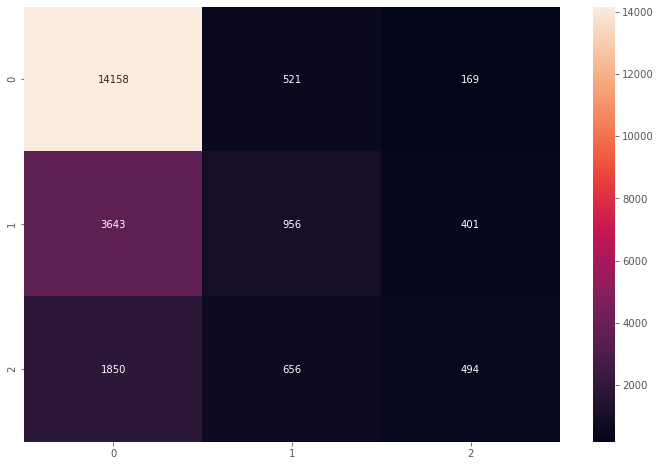

In [40]:
clf = SVC(random_state = 101) #creating an instance of svm classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using KNN Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.79      0.88      0.83     14848
           1       0.50      0.32      0.39      5000
           2       0.51      0.51      0.51      3000

    accuracy                           0.71     22848
   macro avg       0.60      0.57      0.58     22848
weighted avg       0.69      0.71      0.69     22848

Acuuracy is:  0.710171568627451


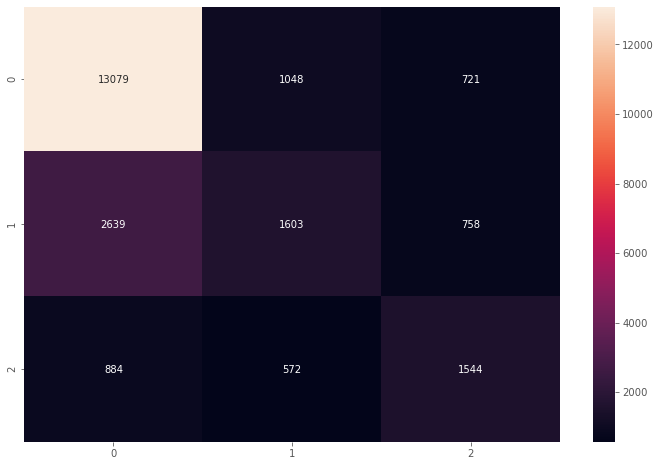

In [41]:
clf = KNeighborsClassifier(n_neighbors = 20) #creating an instance of knn classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using MLP Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.76      0.91      0.83     14848
           1       0.43      0.29      0.34      5000
           2       0.45      0.27      0.34      3000

    accuracy                           0.69     22848
   macro avg       0.55      0.49      0.50     22848
weighted avg       0.65      0.69      0.66     22848

Acuuracy is:  0.6913077731092437


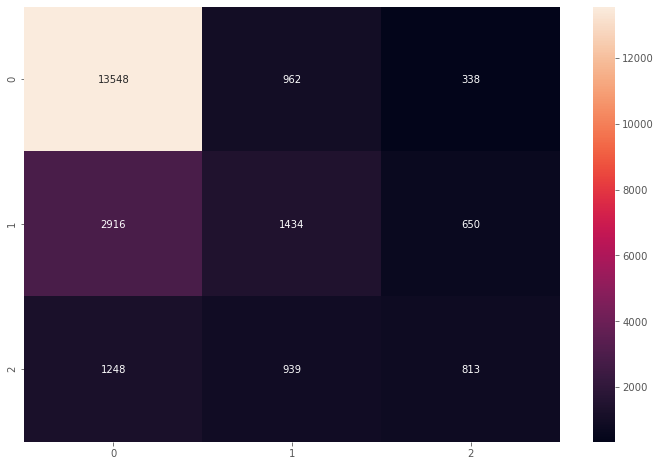

In [42]:
clf = MLPClassifier() #creating an instance of mlp classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using Naive Bayes Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.75      0.87      0.81     14848
           1       0.38      0.12      0.18      5000
           2       0.32      0.43      0.37      3000

    accuracy                           0.65     22848
   macro avg       0.48      0.47      0.45     22848
weighted avg       0.61      0.65      0.61     22848

Acuuracy is:  0.6488532913165266


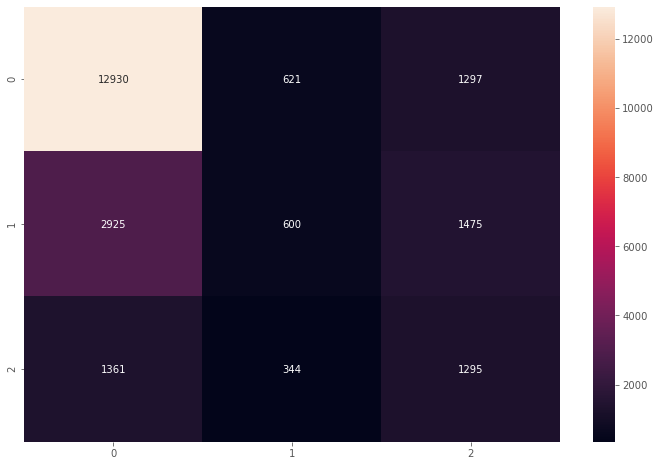

In [43]:
clf = GaussianNB() #creating an instance of naive bayes classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using Logistic Regression  Classifier

classification Report :
               precision    recall  f1-score   support

           0       0.69      0.94      0.80     14848
           1       0.40      0.21      0.27      5000
           2       0.36      0.01      0.02      3000

    accuracy                           0.66     22848
   macro avg       0.48      0.39      0.37     22848
weighted avg       0.59      0.66      0.58     22848

Acuuracy is:  0.6598389355742297


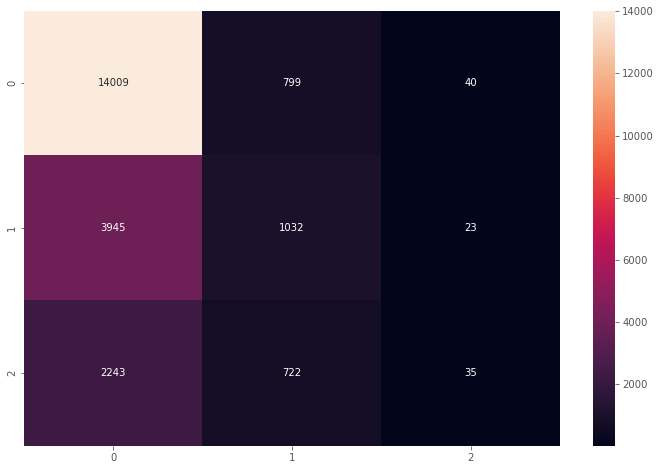

In [44]:
clf = LogisticRegression() #creating an instance of logistic regression classifier
clf.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_val, clf.predict(X_val))) #classificatio report on validation set
cm = confusion_matrix(y_val, clf.predict(X_val)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_val, clf.predict(X_val))) #calculating accuracy score on validation set.

# Classification using Deep Neural Networks

Train on 91390 samples, validate on 22848 samples
Epoch 1/25
91390/91390 [==============================] - 12s 130us/sample - loss: 1.0047 - accuracy: 0.5930 - val_loss: 0.9067 - val_accuracy: 0.6499
Epoch 2/25
91390/91390 [==============================] - 12s 129us/sample - loss: 0.9066 - accuracy: 0.6495 - val_loss: 0.8770 - val_accuracy: 0.6499
Epoch 3/25
91390/91390 [==============================] - 14s 149us/sample - loss: 0.8827 - accuracy: 0.6498 - val_loss: 0.8670 - val_accuracy: 0.6499
Epoch 4/25
91390/91390 [==============================] - 13s 138us/sample - loss: 0.8740 - accuracy: 0.6499 - val_loss: 0.8607 - val_accuracy: 0.6499
Epoch 5/25
91390/91390 [==============================] - 9s 101us/sample - loss: 0.8671 - accuracy: 0.6499 - val_loss: 0.8545 - val_accuracy: 0.6499
Epoch 6/25
91390/91390 [==============================] - 13s 145us/sample - loss: 0.8604 - accuracy: 0.6501 - val_loss: 0.8471 - val_accuracy: 0.6499
AxesSubplot(0.125,0.125;0.775x0.755)


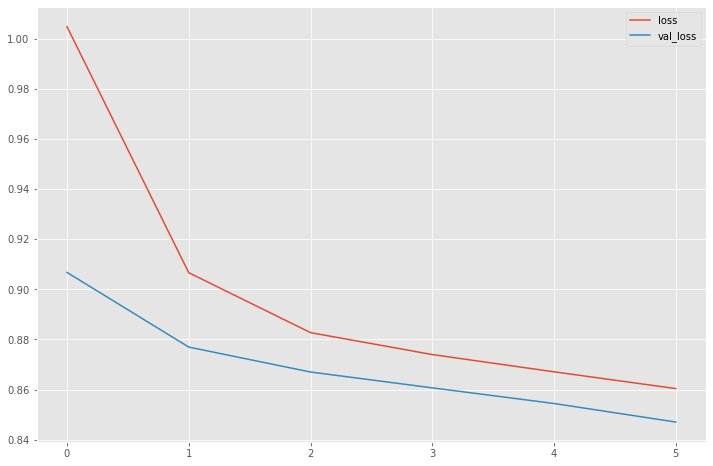

In [45]:
#one hot encoding the target variable
y_train_encoded = to_categorical(y_train, num_classes = 3)
y_val_encoded = to_categorical(y_val, num_classes = 3)

#Creating the model
model = Sequential()

#input layer
model.add(Dense(units = 7, activation = "relu"))
model.add(Dropout(rate = 0.5))

#first hidden layer
model.add(Dense(units = 5, activation = "relu"))
model.add(Dropout(rate = 0.4))

#second hidden layer
model.add(Dense(units = 5, activation = "relu"))
model.add(Dropout(rate = 0.3))

#output layer
model.add(Dense(units=3,activation='softmax'))

#model compile
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

#creating callback function
callback= [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy'),
]

#fitting the model
model.fit(x=X_train, 
          y=y_train_encoded, 
          epochs=25,
          batch_size=32,
          validation_data=(X_val, y_val_encoded),
          callbacks = callback
          )

#Evaluating model performence
losses = pd.DataFrame(model.history.history)
print(losses[['loss','val_loss']].plot())

# Accuracy score for different Algorithms

| Method | Accuracy Score |
| --- | --- | 
| Random Forest Classifier | 90.43 |
| Decision Tree Classifier | 84.51 |
| KNN Classifier | 71.01 |
| xgboost Classifier | 69.17 |
| MLP Classifier | 69.13 |
| SVM Classifier | 68.31 |
| Logistic Regression Classifier | 65.98 |
| Deep Neural Network Classifier | 64.99 |
| Naive Bayes Classifier | 64.88 |

## So, Random Forest Classifier performs best on this dataset.
## Thus, we will make prediction on test dataset using Random Forest Classifier

# Prediction on test dataset

In [46]:
clf = RandomForestClassifier(max_depth = 25, random_state = 101) #creating an instance of random forest classifier
clf.fit(X_train, y_train) #fitting on training data
prediction = clf.predict(test_df) #predicting on test dataset

# Creating Submission CSV File

In [47]:
submission = pd.DataFrame(data = {'ID': test['ID'], 'Crop_Damage': prediction}) #creating the submission DataFrame
submission.to_csv("submission.csv", index = False) #creating the submission csv file